<a href="https://colab.research.google.com/github/shahd1995913/Tahalf-Mechine-Learning-DS3/blob/main/Task/ML1_S5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML1-S5 (Assignment)
----

## Problem 1:  Logistic Regression
---

- Mention 2 types of regularization used to overcome the overfitting problem and what is the difference between them.

- Using the data below in X,y. Build a **`logistic model`** to predict the output and evaluate the model with a confusion matrix.

# Common causes for overfitting are :
1. When the model is complex enough that it starts modeling the noise in the training data.
2. When the training data is relatively small and is an insufficient representation of the underlying distribution that it is sampled from, the model fails to learn a generalizable mapping.

# Data Augmentation

- Data augmentation is a regularization technique, which is used generally when we have images as data sets.
-  It generates additional data artificially from the existing training data by making minor changes such as rotation, flipping, cropping, or blurring a few pixels in the image, and this process generates more and more data. 
- Through this regularization technique, the model variance is reduced, which in turn decreases the regularization error.

# Early Stopping
- It is a kind of cross-validation strategy where one part of the training set is used as a validation set, and the performance of the model is gauged against this set. So if the performance on this validation set gets worse, the training on the model is immediately stopped.

- The main idea behind this technique is that while fitting a neural network on training data, consecutively, the model is evaluated on the unseen data or the validation set after each iteration. So if the performance on this validation set is decreasing or remaining the same for the certain iterations, then the process of model training is stopped.

# Dropout

- Another most frequently used regularization technique is dropout. 
- It essentially means that during the training, randomly selected neurons are turned off or ‘dropped’ out. 
- It means that they are temporarily obstructed from influencing or activating the downward neuron in a forward pass, and none of the weights updates is applied on the backward pass.

- So if neurons are randomly dropped out of the network during training, the other neurons step in and make the predictions for the missing neurons. 
- This results in independent internal representations being learned by the network, making the network less sensitive to the specific weight of the neurons. 
- Such a network is better generalised and has fewer chances of producing overfitting.

# L2 and L1 Regularization
- L2 and L1 are the most common types of regularization. 
- Regularization works on the premise that smaller weights lead to simpler models which in results helps in avoiding overfitting. 
- So to obtain a smaller weight matrix, these techniques add a ‘regularization term’ along with the loss to obtain the cost function.

## Cost function = Loss + Regularization term

- The difference between L1 and L2 regularization techniques lies in the nature of this regularization term. In general, the addition of this regularization term causes the values of the weight matrices to reduce, leading simpler models.
# -------------------------------------------------------------------------
## Overfitting impacts the accuracy of Machine Learning models. The model attempts to capture the data points that do not represent the accurate properties of data. These data points may be considered as noise. To avoid the occurrence of overfitting, we may use a method called regularization.

# LASSO & Ridge
1. Lasso regression
Lasso regression is a regularization technique used to reduce model complexity. It is also known as L1 regularization. Lasso stands for Least Absolute Shrinkage and Selector Operator.

2. Ridge regression
Ridge regression refers to a type of linear regression where in order to get better predictions in the long term, we introduce a small amount of bias. It is also known as L2 regularization. In ridge regression, we have the same loss function with a slight alteration in the penalty term,


In [3]:
### Put Your Answer Here ####
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Dataset
import numpy as np
X = np.arange(15).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [7]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [10]:
x_train, x_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [12]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [13]:
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [14]:
x_test = scaler.transform(x_test)


In [15]:
y_pred = model.predict(x_test)


In [17]:
print(model.score(x_train, y_train))

print(model.score(x_test, y_test))

1.0
1.0


In [18]:
confusion_matrix(y_test, y_pred)

array([[2, 0],
       [0, 1]])

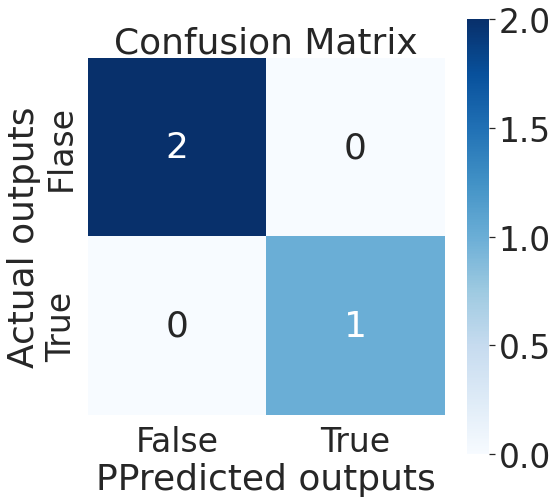

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# ax = plt.subplot()
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
sns.set(font_scale=3.0) #edited as suggested
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('PPredicted outputs');
ax.set_ylabel('Actual outputs');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



## Problem 2:  KNN + metrics
---
Build a classification model based on KNN to classify the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) , report the training and testing `accuracy` ,`f1score` , `recall` , `percision`.

In [ ]:
### Start Your Code Here ####


### End Your Code Here ####

## Problem 3: Naive Bayes
---

- Build a gaussian naive bayes model on [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) , you can load the data using sklearn , split the data to train 70% and test 30%.

- If we have a discrete data which type of naive bayes should we use?

- Create a dataset with 0 and 1 ,the training data will have 1000 instance and each instance will have 8 features , the testing data will have 100 instance and build a naive bayes model on it .

In [ ]:
### Start Your Code Here ####


### End Your Code Here ####